In [1]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

#give path to the simulation output .root file
f = uproot.open('/home/amslivar/work/AmBe_v2/data/AmBe_emer_gamma/am_outcapsule_normalized.root')
f.classnames()




Your uproot version:  5.0.13
Info: uproot 4+ is recommended.


{'tcapsule;16': 'TTree', 'tcapsule;15': 'TTree'}

In [2]:
f['tcapsule;16'].show()

t = f['tcapsule;16']
rq = t.arrays(library='np')


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Eemission            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
nemission            | int32_t                  | AsDtype('>i4')
idpdgemission        | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
costhemission        | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
E0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
ncapsuleprimary      | int32_t                  | AsDtype('>i4')
x0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
y0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
z0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...


In [3]:
EmergentGammas = rq['Eemission']
PrimaryGammas = rq['E0capsule']

print(len(PrimaryGammas))
EmergentGammas = np.concatenate( list(EmergentGammas), axis=0 )
PrimaryGammas = np.concatenate( list(PrimaryGammas), axis=0 )

EmergentGammas = EmergentGammas.flatten()
PrimaryGammas = PrimaryGammas.flatten()

print(type(EmergentGammas))
print(EmergentGammas)

print(len(PrimaryGammas))

10000000
<class 'numpy.ndarray'>
[648.31354835 722.01018346 338.88942033 ... 329.91562765 334.04473795
 574.20735546]
10000000


10000000
<class 'numpy.ndarray'>
[22 22 22 ... 22 22 22]


(array([  201.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 51248.]),
 array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.]),
 <BarContainer object of 11 artists>)

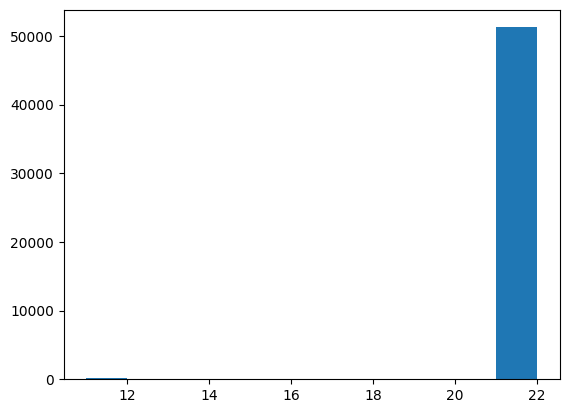

In [4]:

PID = rq['idpdgemission']

print(len(PrimaryGammas))
PID = np.concatenate( list(PID), axis=0 )

PID = PID.flatten()

print(type(PID))
print(PID)

plt.hist(PID, bins=11)


#for i in range(0, len(PID)):
#        print(PID[i])

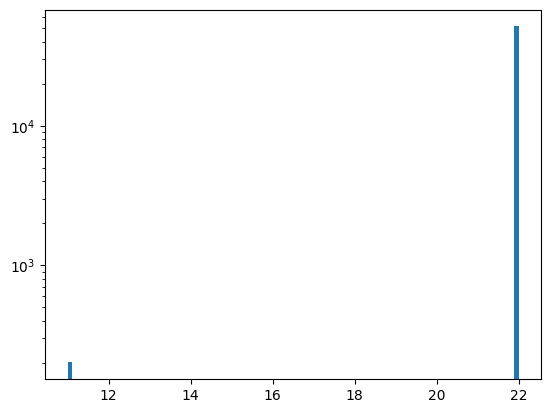

In [5]:
plt.hist(PID, bins=100)
plt.yscale('log')

In [6]:
# Ensure both arrays are numpy.ndarray
assert isinstance(EmergentGammas, np.ndarray)
assert isinstance(PID, np.ndarray)

# Create a structured array with fields 'Gamma' and 'PID'
structured_array = np.zeros(EmergentGammas.shape[0], dtype=[('Masked_Em_Gamma', 'f4'), ('PID', 'i4')])
structured_array['Masked_Em_Gamma'] = EmergentGammas
structured_array['PID'] = PID

# Create a boolean mask where PID is 22
mask = structured_array['PID'] == 22

# Use the mask to filter the array
masked_structured_array = structured_array[mask]

# Now filtered_structured_array contains only entries with PID == 22
print(masked_structured_array)

[(648.31354, 22) (722.0102 , 22) (338.88943, 22) ... (329.91562, 22)
 (334.04474, 22) (574.20734, 22)]


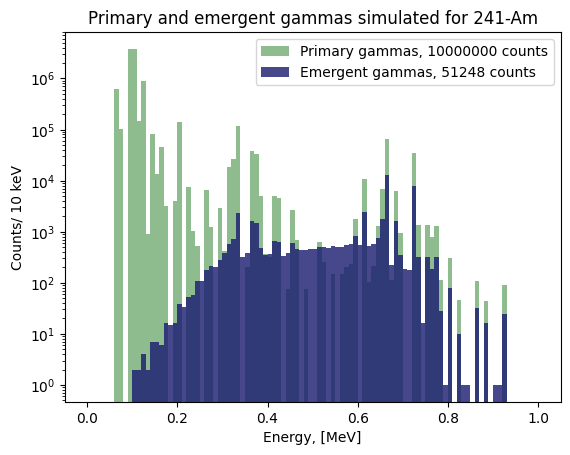

In [7]:
plt.hist(PrimaryGammas/1000, bins=100, range=(0, 1), color='darkseagreen', label=r'Primary gammas, {} counts'.format(len(PrimaryGammas)))
plt.hist(masked_structured_array['Masked_Em_Gamma']/1000, bins=100, range=(0, 1), color='midnightblue', alpha=0.8, label='Emergent gammas, {} counts'.format(len(masked_structured_array['Masked_Em_Gamma'])))
plt.xlabel('Energy, [MeV]')
plt.ylabel('Counts/ 10 keV')
plt.title('Primary and emergent gammas simulated for 241-Am')
plt.legend()
#.xlim(0,1)
plt.yscale('log')
#plt.savefig("Primary_and_emergent_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

In [8]:
print(len(masked_structured_array['Masked_Em_Gamma']))
print(len(PrimaryGammas))
print(len(masked_structured_array['Masked_Em_Gamma'])/len(PrimaryGammas))

51248
10000000
0.0051248
